## Step 0. configurations


In [1]:
import warnings



warnings.filterwarnings("ignore")

## Step 1. reading data and importing libraries


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
df = pd.read_csv("../data/sampled_class/sampled_data_100000.csv")
df.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,CLASS_fraud_label
0,1922,1018,Visa,Debit,4564887957887151,01/2023,17,YES,1,$13609,...,5970,$22.07,Swipe Transaction,96795,Palm Coast,FL,32137.0,5813,NaN,No
1,1222,1166,Mastercard,Credit,5702377806791449,08/2021,548,YES,2,$14100,...,1222,$111.45,Swipe Transaction,61195,Hamilton,OH,45013.0,5541,NaN,No
2,6057,394,Visa,Debit,4699535367725055,06/2023,544,YES,1,$22015,...,4717,$15.52,Chip Transaction,91128,Stamford,CT,6922.0,5411,NaN,No
3,3415,1920,Amex,Credit,347590336473806,08/2021,561,YES,1,$8200,...,3415,$23.21,Online Transaction,9932,ONLINE,NaN,NaN,5311,NaN,No
4,138,1094,Visa,Debit,4556928160477229,06/2023,64,YES,2,$2365,...,3755,$31.32,Swipe Transaction,94357,Traverse City,MI,49686.0,5300,NaN,NaN


## Step 2. understanding the data


In [4]:
df.shape

(100000, 38)

In [5]:
df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'transaction_id',
       'date', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city',
       'merchant_state', 'zip', 'mcc', 'errors', 'CLASS_fraud_label'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=100000, step=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     100000 non-null  int64  
 1   client_id              100000 non-null  int64  
 2   card_brand             100000 non-null  object 
 3   card_type              100000 non-null  object 
 4   card_number            100000 non-null  int64  
 5   expires                100000 non-null  object 
 6   cvv                    100000 non-null  int64  
 7   has_chip               100000 non-null  object 
 8   num_cards_issued       100000 non-null  int64  
 9   credit_limit           100000 non-null  object 
 10  acct_open_date         100000 non-null  object 
 11  year_pin_last_changed  100000 non-null  int64  
 12  card_on_dark_web       100000 non-null  object 
 13  current_age            100000 non-null  int64  
 14  retirement_age         100000 non-nul

In [8]:
df.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards,transaction_id,card_id,merchant_id,zip,mcc
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,87525.000000,100000.000000
mean,3399.291960,1028.049170,4.805951e+15,502.705760,1.510730,2012.213830,56.498040,66.708740,1962.689910,6.527110,37.398638,-92.099227,720.555730,4.475580,1.558244e+07,3487.130320,48141.640750,51997.020771,5568.097290
std,1715.482773,583.151849,1.347879e+15,289.522434,0.518563,3.521308,16.453491,3.412563,16.429238,3.603009,5.119450,16.625697,61.900546,1.532947,4.715329e+06,1676.630155,25898.209532,29550.596198,880.980241
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000,23.000000,53.000000,1918.000000,1.000000,21.300000,-158.180000,488.000000,1.000000,7.475454e+06,0.000000,22.000000,1001.000000,1711.000000
25%,2216.000000,517.000000,4.476983e+15,255.000000,1.000000,2010.000000,44.000000,65.000000,1952.000000,3.000000,33.890000,-97.670000,689.000000,3.000000,1.148962e+07,2427.000000,25887.000000,28643.000000,5300.000000
50%,3537.000000,1066.000000,5.105294e+15,510.000000,2.000000,2011.000000,54.000000,67.000000,1965.000000,7.000000,38.330000,-87.180000,722.000000,4.000000,1.557144e+07,3648.000000,46474.000000,48188.000000,5499.000000
75%,4845.000000,1534.000000,5.579266e+15,750.000000,2.000000,2014.000000,67.000000,69.000000,1975.000000,10.000000,41.150000,-80.130000,761.000000,5.000000,1.966583e+07,4897.000000,68710.250000,78240.000000,5813.000000
max,6144.000000,1998.000000,6.997197e+15,999.000000,3.000000,2020.000000,101.000000,79.000000,1996.000000,12.000000,48.530000,-68.670000,850.000000,9.000000,2.376178e+07,6138.000000,100340.000000,99611.000000,9402.000000


In [9]:
df.columns

Index(['id', 'client_id', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'transaction_id',
       'date', 'card_id', 'amount', 'use_chip', 'merchant_id', 'merchant_city',
       'merchant_state', 'zip', 'mcc', 'errors', 'CLASS_fraud_label'],
      dtype='object')

In [10]:
df.dtypes

id                         int64
client_id                  int64
card_brand                object
card_type                 object
card_number                int64
expires                   object
cvv                        int64
has_chip                  object
num_cards_issued           int64
credit_limit              object
acct_open_date            object
year_pin_last_changed      int64
card_on_dark_web          object
current_age                int64
retirement_age             int64
birth_year                 int64
birth_month                int64
gender                    object
address                   object
latitude                 float64
longitude                float64
per_capita_income         object
yearly_income             object
total_debt                object
credit_score               int64
num_credit_cards           int64
transaction_id             int64
date                      object
card_id                    int64
amount                    object
use_chip  

## Step 3. Cleaning


#### Handling ugly data


In [11]:
# Convert date-columns to datetime
for date_columns in ["expires", "acct_open_date", "date"]:
    df[date_columns] = pd.to_datetime(df[date_columns])

# Convert 2-valued object-columns to boolean
df["has_chip"] = df["has_chip"].map({"YES": True, "NO": False}).astype(bool)
df["card_on_dark_web"] = (
    df["card_on_dark_web"].map({"Yes": True, "No": False}).astype(bool)
)

if "gender" in df.columns:
    df["gender_male"] = df["gender"].map({"Male": 1, "Female": 0}).astype(bool)
    df.drop(columns=["gender"], inplace=True)

# Clean column containing dollar amounts, by removing the dollar sign and converting it to float
for dollar_columns in [
    "credit_limit",
    "per_capita_income",
    "yearly_income",
    "total_debt",
    "amount",
]:
    if df[dollar_columns].dtype == "object":
        df[dollar_columns] = df[dollar_columns].str.replace("$", "").astype(float)

### Handling missing data


In [12]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

merchant_state       11790
zip                  12475
errors               98456
CLASS_fraud_label    32991
dtype: int64

In [13]:
# Handle column `merchant_state`, by setting it so "ONLINE" if `merchant_city` is "ONLINE"
# and then setting all the ones that are states to "IN-STORE"
# and then drop `merchant_city`
df["merchant_state"] = np.where(
    df["merchant_city"] == "ONLINE", "ONLINE", df["merchant_state"]
)
df["merchant_state"] = np.where(
    df["merchant_state"].str.len() == 2, "IN-STORE", df["merchant_state"]
)

df.drop(columns=["merchant_city"], inplace=True)

# Handle column `zip` by setting it to 0 if `merchant_city` is "ONLINE",
# and afterwards dropping rows that still have missing values
df["zip"] = np.where(df["merchant_state"] == "ONLINE", 0, df["zip"])
df.dropna(subset=["zip"], inplace=True)

# Handle column `errors` by setting it to "No Error" if the value is missing
df["errors"].fillna("No Error", inplace=True)

# Handle column `CLASS_fraud_label` by dropping rows with missing values
df.dropna(subset=["CLASS_fraud_label"], inplace=True)

### Handling useless data


In [14]:
for useless_column in [
    "address",  # Mostly unique values
    "zip",  # Mostly unique values
    "card_number",  # Mostly unique values
    "id",  # ID columns are not useful for training a model
    "client_id",  # ID columns are not useful for training a model
    "transaction_id",  # ID columns are not useful for training a model
    "merchant_id",  # ID columns are not useful for training a model
]:
    if useless_column in df.columns:
        df.drop(columns=[useless_column], inplace=True)

### Handling datetimes


In [15]:
datetime_columns = df.select_dtypes(include=["datetime64"]).columns

if "expires" in df.columns:
	df["expires_year"] = df["expires"].dt.year
	df["expires_month"] = df["expires"].dt.month
	df["expires_day"] = df["expires"].dt.day

	df.drop("expires", axis=1, inplace=True)

if "acct_open_date" in df.columns:
	df["acct_open_date_year"] = df["acct_open_date"].dt.year
	df["acct_open_date_month"] = df["acct_open_date"].dt.month
	df["acct_open_date_day"] = df["acct_open_date"].dt.day

	df.drop("acct_open_date", axis=1, inplace=True)

if "date" in df.columns:
	df["transaction_date_year"] = df["date"].dt.year
	df["transaction_date_month"] = df["date"].dt.month
	df["transaction_date_day"] = df["date"].dt.day
	df["transaction_date_hour"] = df["date"].dt.hour
	df["transaction_date_minute"] = df["date"].dt.minute
	df["transaction_date_second"] = df["date"].dt.second
	
	df.drop("date", axis=1, inplace=True)


## Step 4. Visualisation


In [16]:
numerical_columns = df.select_dtypes(include="number").columns

df[numerical_columns].dtypes

cvv                          int64
num_cards_issued             int64
credit_limit               float64
year_pin_last_changed        int64
current_age                  int64
retirement_age               int64
birth_year                   int64
birth_month                  int64
latitude                   float64
longitude                  float64
per_capita_income          float64
yearly_income              float64
total_debt                 float64
credit_score                 int64
num_credit_cards             int64
card_id                      int64
amount                     float64
mcc                          int64
expires_year                 int32
expires_month                int32
expires_day                  int32
acct_open_date_year          int32
acct_open_date_month         int32
acct_open_date_day           int32
transaction_date_year        int32
transaction_date_month       int32
transaction_date_day         int32
transaction_date_hour        int32
transaction_date_min

In [17]:
categorical_columns = df.select_dtypes(include="object").columns
categorical_columns

Index(['card_brand', 'card_type', 'use_chip', 'merchant_state', 'errors',
       'CLASS_fraud_label'],
      dtype='object')

In [18]:
boolean_columns = df.select_dtypes(include="bool").columns
boolean_columns

Index(['has_chip', 'card_on_dark_web', 'gender_male'], dtype='object')

### **Distributions**


Numerical columns


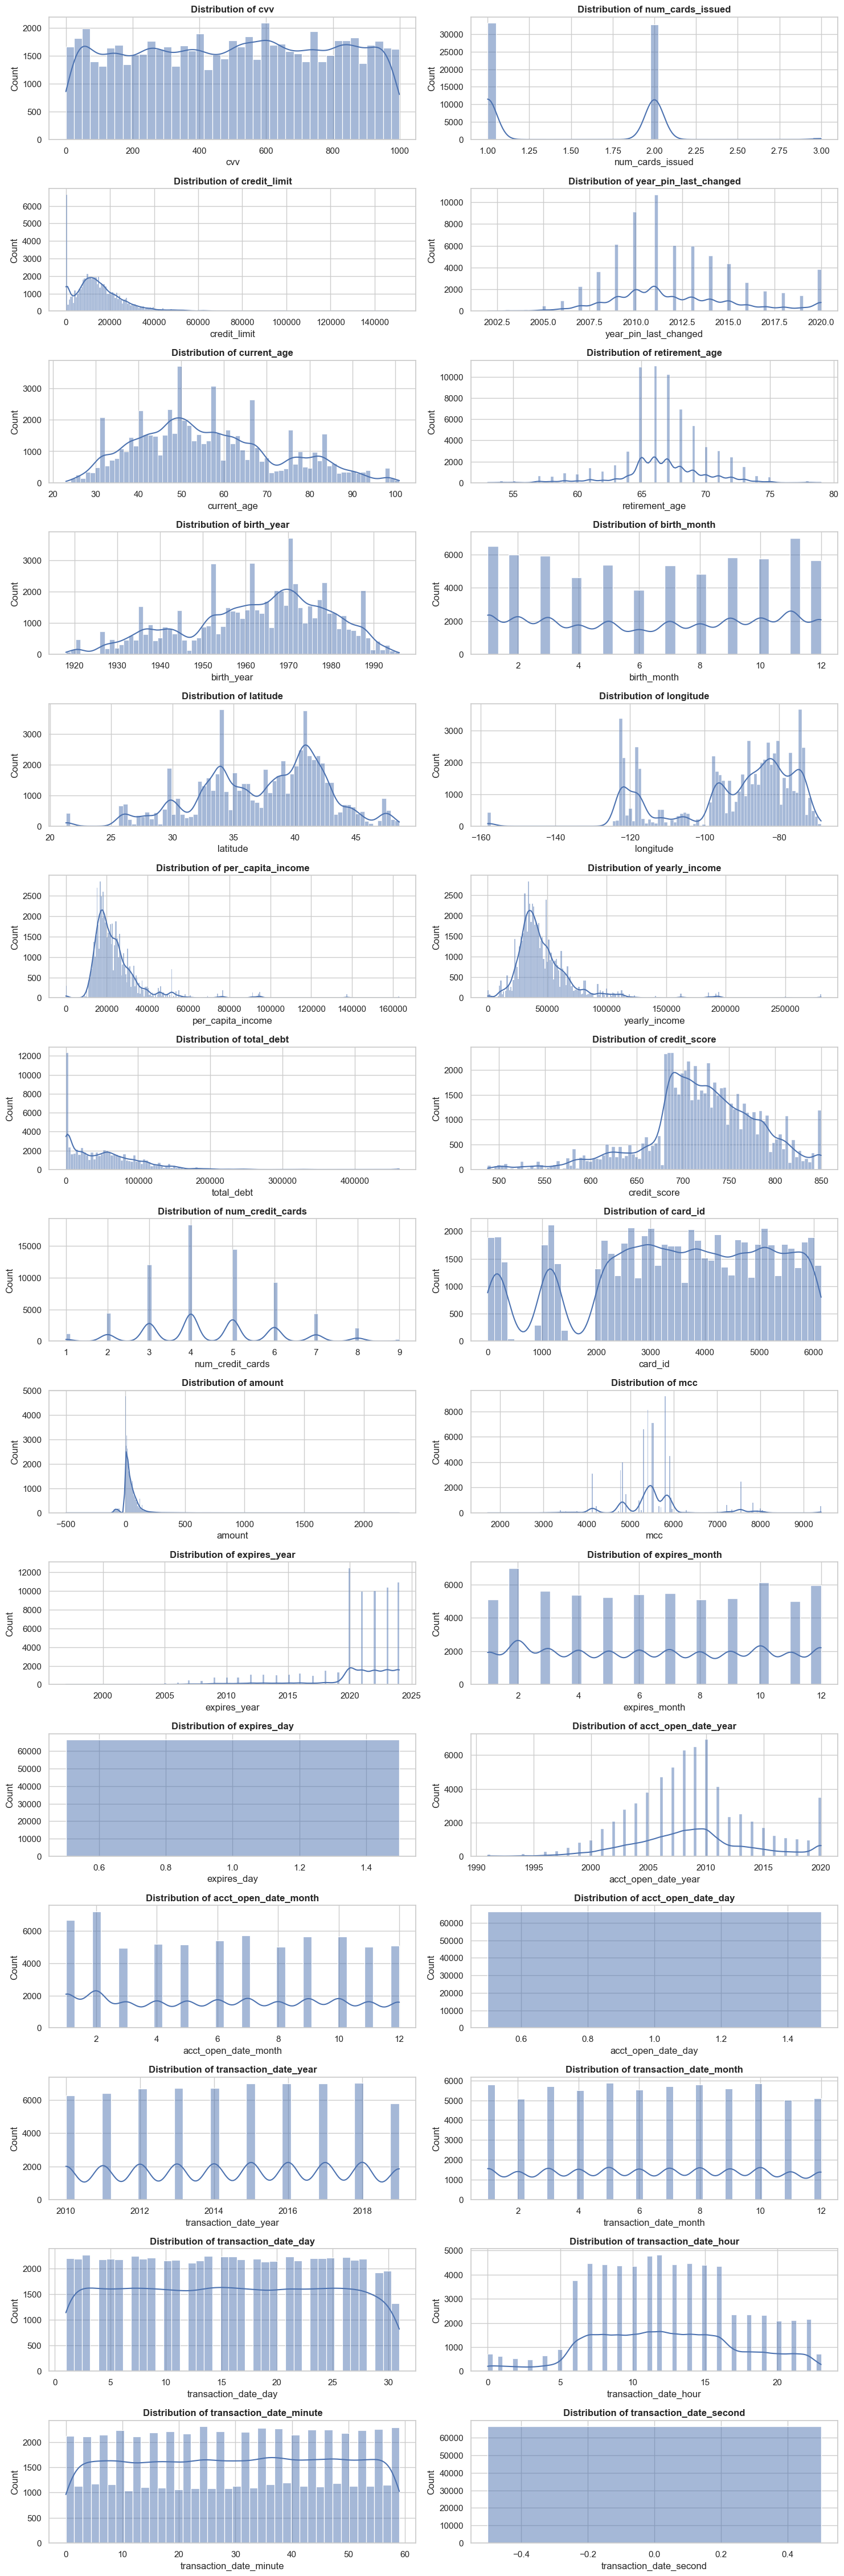

In [19]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(df.columns) // 2 + len(df.columns) % 2, 2, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

Categorical columns


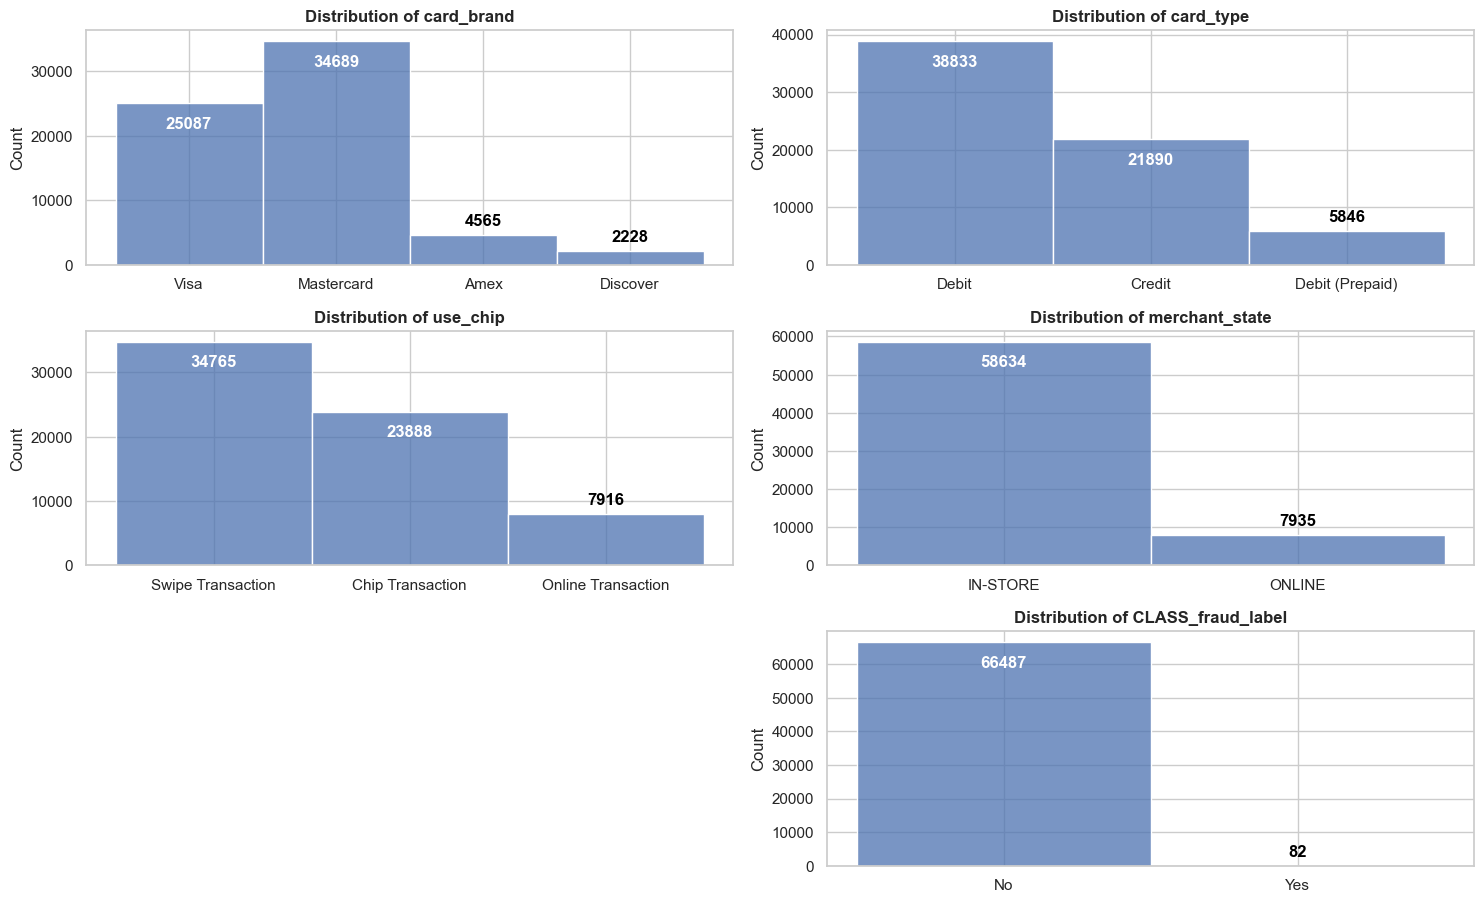

In [20]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(categorical_columns):
    if column in ["errors"]:
        continue

    plt.subplot(len(df.columns) // 2 + len(df.columns) % 2, 2, i + 1)
    ax = sns.histplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")
    plt.xlabel("")

    # Add numbers above each bar
    for p in ax.patches:
        height = p.get_height()
        # Inside bar
        if height > 10_000:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2.0, height),
                ha="center",
                va="center",
                xytext=(0, -15),
                textcoords="offset points",
                fontweight="bold",
                color="white",
            )
        # Above bar
        if height <= 10_000:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2.0, height),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points",
                fontweight="bold",
                color="black",
            )

plt.tight_layout()
plt.show()

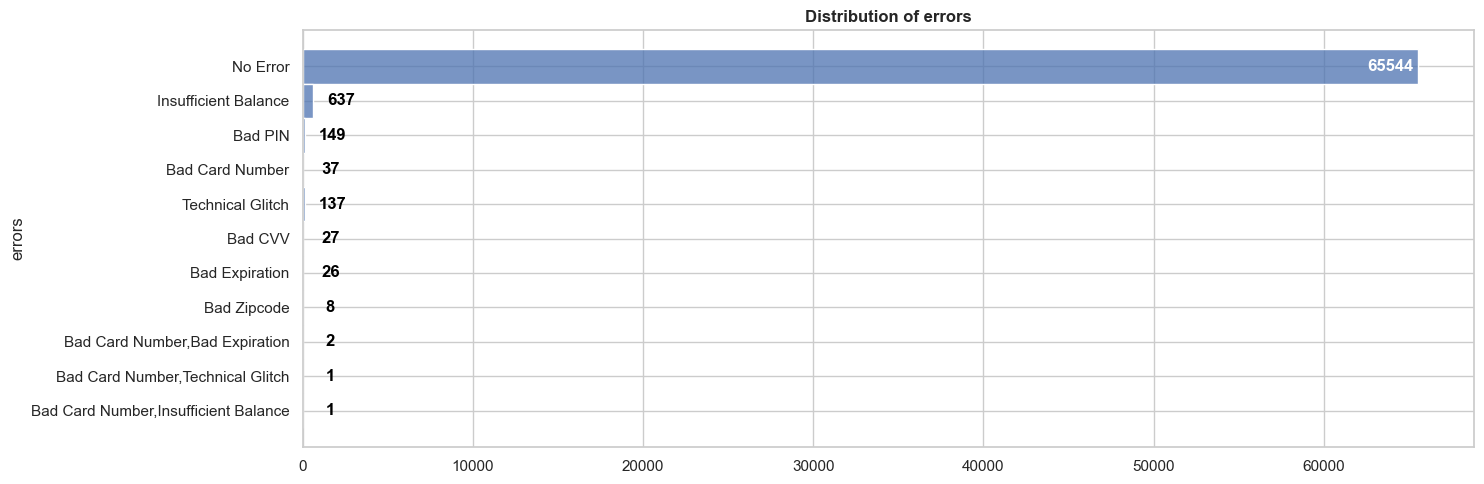

In [21]:
plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df, y=df["errors"])
plt.title(f"Distribution of errors", fontweight="bold")
plt.xlabel("")

# Add numbers beside each bar
for p in ax.patches:
    width = p.get_width()
    
    # Inside bar
    if width > 10_000:
        ax.annotate(
                f"{int(width)}",
                (width, p.get_y() + p.get_height() / 2.0),
                ha="center",
                va="center",
                xytext=(-20, 0),
                textcoords="offset points",
                fontweight="bold",
                color="white",
            )
    # Beside bar
    if width <= 10_000:
        ax.annotate(
			f"{int(width)}",
			(width, p.get_y() + p.get_height() / 2.0),
			ha="center",
			va="center",
			xytext=(20, 0),
			textcoords="offset points",
			fontweight="bold",
			color="black",
		)

plt.tight_layout()
plt.show()

Boolean columns


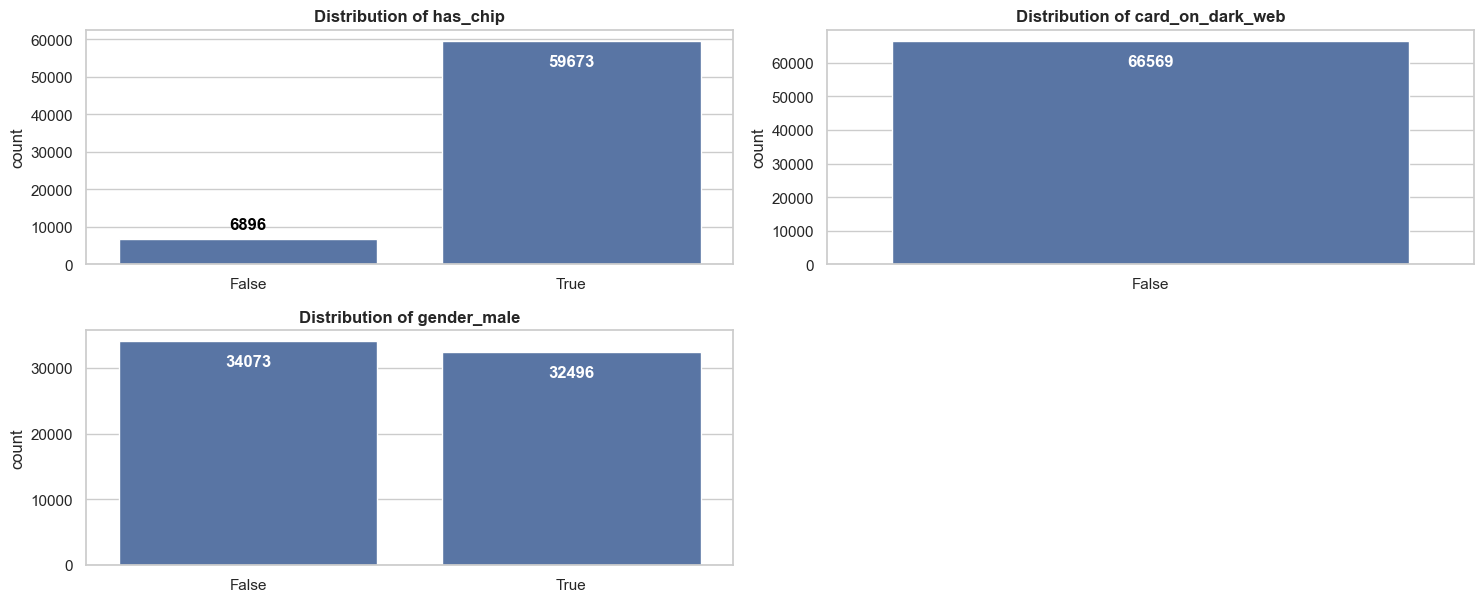

In [22]:
plt.figure(figsize=(15, 60))

for i, column in enumerate(boolean_columns):
    plt.subplot(len(df.columns) // 2 + len(df.columns) % 2, 2, i + 1)
    ax = sns.countplot(data=df, x=df[column])
    plt.title(f"Distribution of {column}", fontweight="bold")
    plt.xlabel("")

    # Add numbers above each bar
    for p in ax.patches:
        height = p.get_height()
        # Inside bar
        if height > 7000:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2.0, height),
                ha="center",
                va="center",
                xytext=(0, -15),
                textcoords="offset points",
                fontweight="bold",
                color="white",
            )
        # Above bar
        if height <= 7000:
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width() / 2.0, height),
                ha="center",
                va="center",
                xytext=(0, 10),
                textcoords="offset points",
                fontweight="bold",
                color="black",
            )

plt.tight_layout()
plt.show()

### **Correlations**


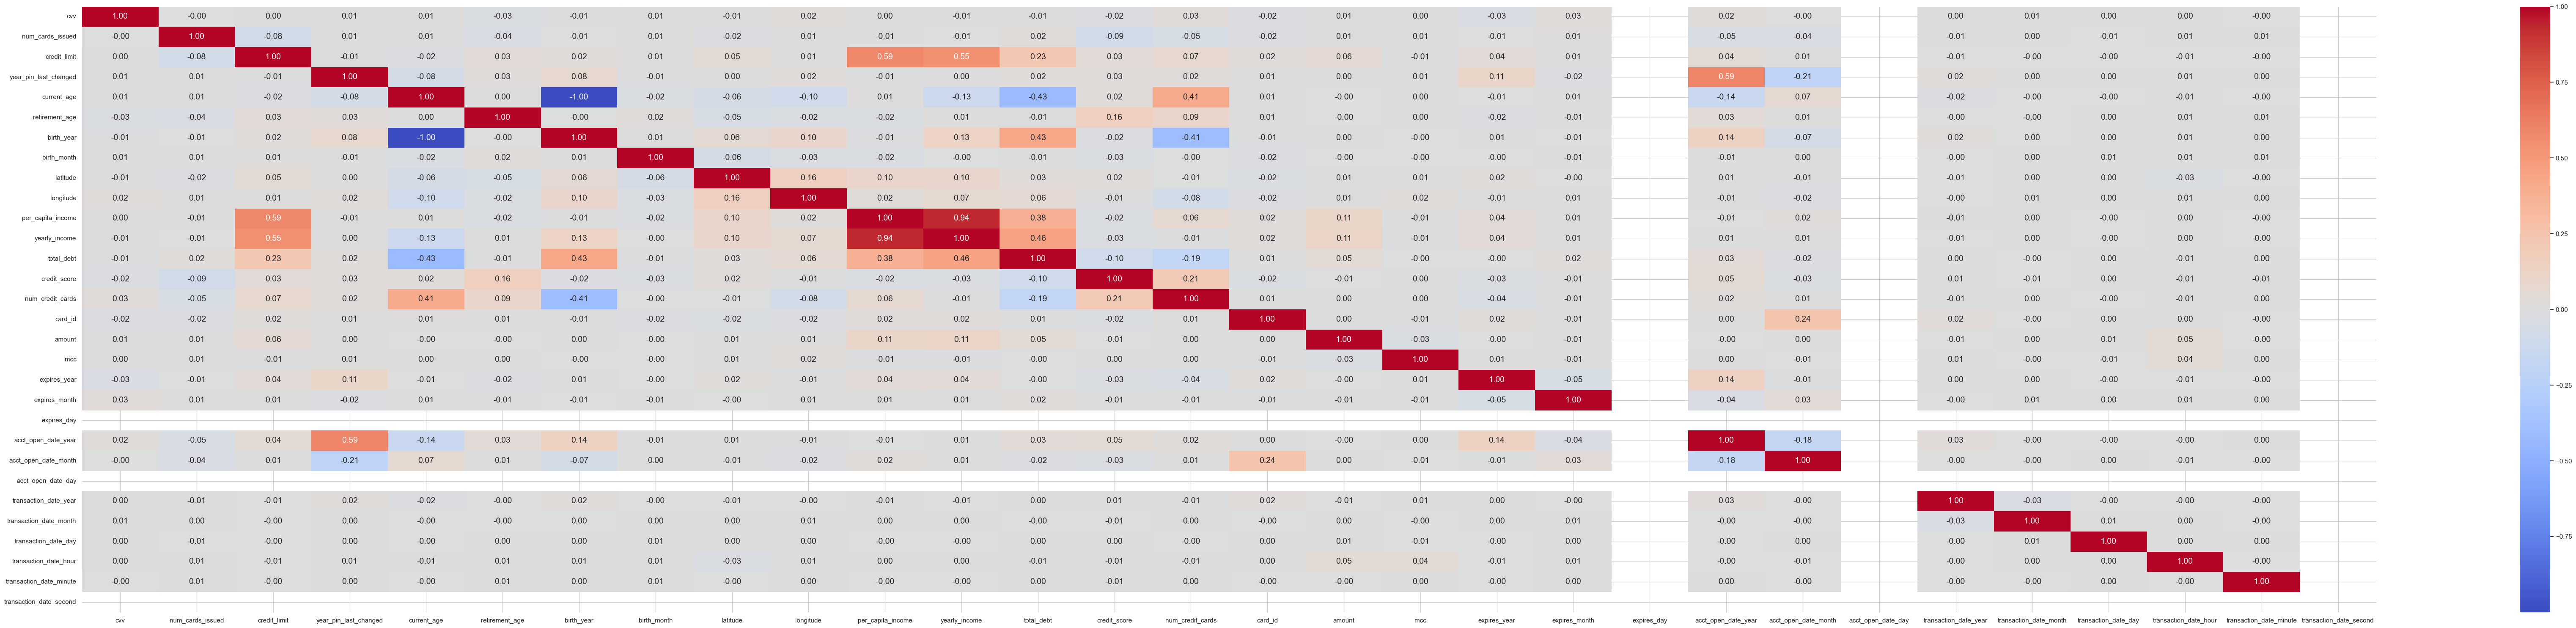

In [23]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(70, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    annot_kws={"size": 14},
    square=False,
    cmap="coolwarm",
    fmt=".2f",
)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Step 4: Modelling


The goal for this dataset is to create a classification model that can predict the column `diagnosis`


### Import modelling libraries


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### Dataset adjustments


In [25]:
# Use LabelEncoder to convert 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
df["CLASS_fraud_label"] = label_encoder.fit_transform(df["CLASS_fraud_label"])

In [26]:
# One-hot encode all categorical columns
df = pd.get_dummies(df, drop_first=True, dtype=float)
df.head()

,cvv,has_chip,num_cards_issued,credit_limit,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,...,errors_Bad Card Number,"errors_Bad Card Number,Bad Expiration","errors_Bad Card Number,Insufficient Balance","errors_Bad Card Number,Technical Glitch",errors_Bad Expiration,errors_Bad PIN,errors_Bad Zipcode,errors_Insufficient Balance,errors_No Error,errors_Technical Glitch
0,17,True,1,13609.0,2020,False,90,71,1929,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,548,True,2,14100.0,2010,False,44,66,1975,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,544,True,1,22015.0,2011,False,52,71,1967,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,561,True,1,8200.0,2013,False,64,66,1955,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,362,True,2,26460.0,2017,False,64,69,1955,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### train_test_split


In [27]:
X = df.drop(columns=["CLASS_fraud_label"])
y = df["CLASS_fraud_label"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [29]:
scaler = MinMaxScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train_stand, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_stand, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

In [30]:
# Create dataset and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

### **PyTorch Model Architecture**


### 1. Architecture


In [31]:
class ClassificationModel(nn.Module):
    def __init__(self, input_size):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)
        self.bn1 = nn.BatchNorm1d(100)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(100, 100)
        self.bn2 = nn.BatchNorm1d(100)
        self.fc3 = nn.Linear(100, 100)
        self.bn3 = nn.BatchNorm1d(100)
        self.fc4 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))
        return x

### 2. Initialisation phase


In [32]:
# Initialise the model, loss function, and optimiser
input_size = X_train_stand.shape[1]
model = ClassificationModel(input_size)

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

### 3. Training loop


In [33]:
num_epochs = 100
patience = 500
best_val_loss = float("inf")
early_stop_counter = 0

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (output > 0.5).float()
        correct_train += (predicted == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_accuracy = correct_train / total_train
    train_loss = running_loss / len(train_loader)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            output = model(X_batch)
            loss = criterion(output, y_batch)
            val_loss += loss.item()
            predicted = (output > 0.5).float()
            correct_val += (predicted == y_batch).sum().item()
            total_val += y_batch.size(0)

    val_accuracy = correct_val / total_val
    val_loss /= len(test_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        best_model_state = model.state_dict()  # Save the best model
    else:
        early_stop_counter += 1

    if early_stop_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        model.load_state_dict(best_model_state)
        break

    if epoch % 2 == 0:
        print(
            f"Epoch {epoch: <3}:\tloss - {train_loss:.4f}, accuracy - {train_accuracy:.4f}, val_loss - {val_loss:.4f}, val_accuracy - {val_accuracy:.4f}"
        )

Epoch 0  :	loss - 0.0283, accuracy - 0.9954, val_loss - 0.0051, val_accuracy - 0.9993
Epoch 2  :	loss - 0.0086, accuracy - 0.9986, val_loss - 0.0045, val_accuracy - 0.9993
Epoch 4  :	loss - 0.0083, accuracy - 0.9986, val_loss - 0.0046, val_accuracy - 0.9993
Epoch 6  :	loss - 0.0078, accuracy - 0.9986, val_loss - 0.0048, val_accuracy - 0.9993
Epoch 8  :	loss - 0.0072, accuracy - 0.9986, val_loss - 0.0054, val_accuracy - 0.9993
Epoch 10 :	loss - 0.0071, accuracy - 0.9986, val_loss - 0.0053, val_accuracy - 0.9993
Epoch 12 :	loss - 0.0066, accuracy - 0.9986, val_loss - 0.0056, val_accuracy - 0.9993
Epoch 14 :	loss - 0.0063, accuracy - 0.9986, val_loss - 0.0056, val_accuracy - 0.9993
Epoch 16 :	loss - 0.0061, accuracy - 0.9986, val_loss - 0.0063, val_accuracy - 0.9993
Epoch 18 :	loss - 0.0056, accuracy - 0.9986, val_loss - 0.0060, val_accuracy - 0.9993
Epoch 20 :	loss - 0.0052, accuracy - 0.9986, val_loss - 0.0064, val_accuracy - 0.9993
Epoch 22 :	loss - 0.0050, accuracy - 0.9986, val_loss 

#### 4. Evaluation


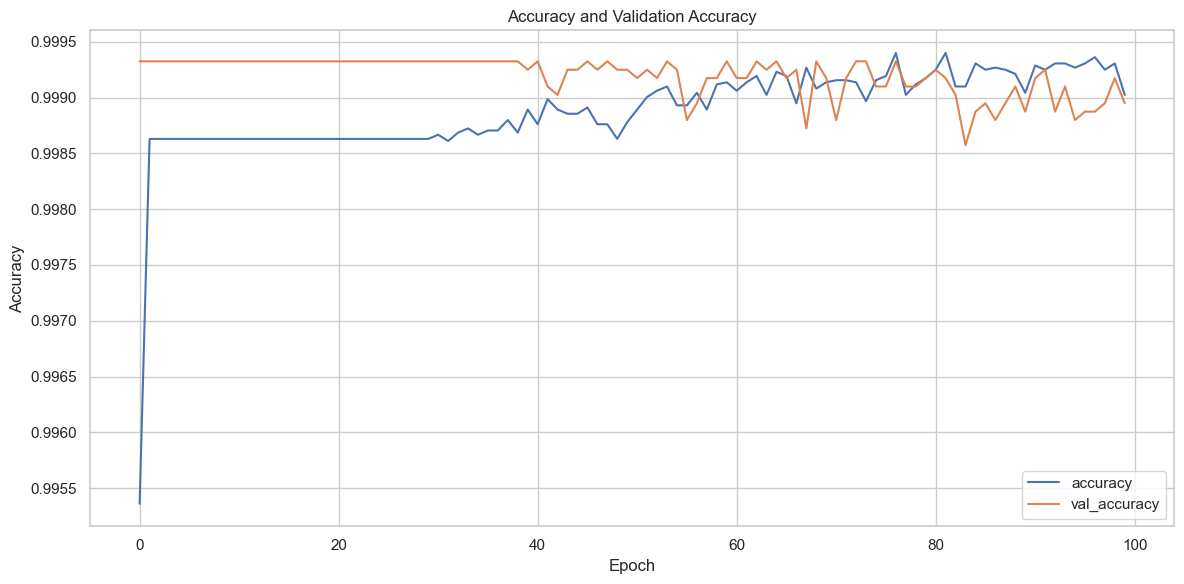

In [34]:
# Plot accuracy and val_accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label="accuracy")
plt.plot(val_accuracies, label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy and Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

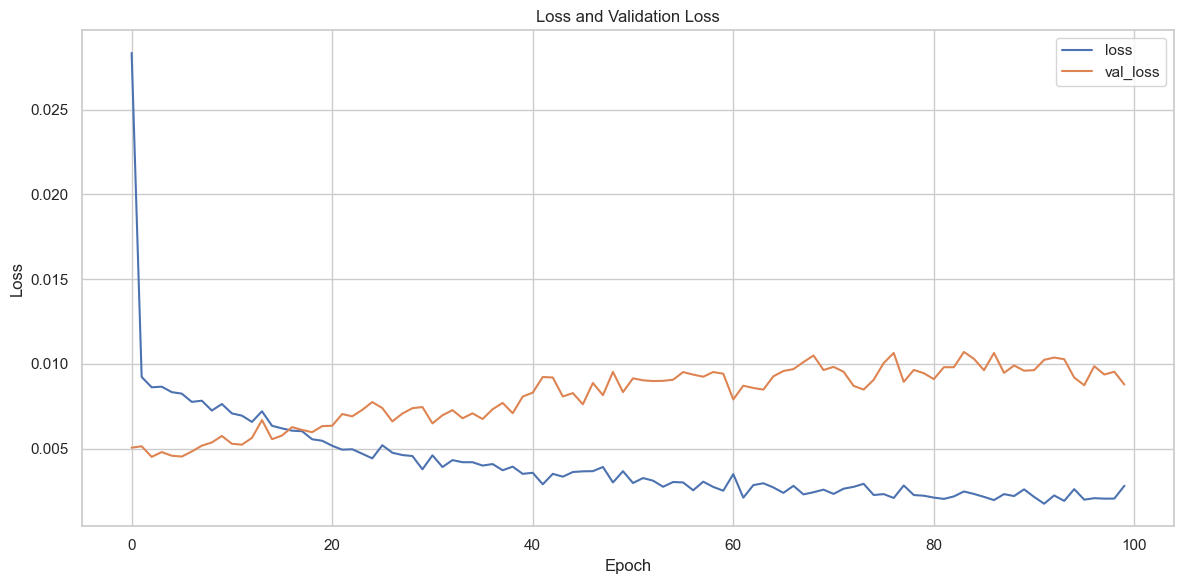

In [35]:
# Plot loss and val_loss
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="loss")
plt.plot(val_losses, label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss and Validation Loss")
plt.legend()

plt.tight_layout()
plt.show()

## Step 5: Evaluation


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test set
model.eval()
y_pred = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        output = model(X_batch)
        y_pred.extend((output > 0.5).float())

y_pred = torch.cat(y_pred).cpu().numpy().flatten()

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["Not Fraud", "Fraud"]))

print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     13305
       Fraud       0.00      0.00      0.00         9

    accuracy                           1.00     13314
   macro avg       0.50      0.50      0.50     13314
weighted avg       1.00      1.00      1.00     13314


Confusion matrix:
[[13300     5]
 [    9     0]]


In [37]:
# Save the model

torch.save(model.state_dict(), "../models/normal/fraud_detection_model.pth")

In [38]:
# import model

model = ClassificationModel(input_size)
model.load_state_dict(torch.load("../models/normal/fraud_detection_model.pth"))
model.eval()

ClassificationModel(
  (fc1): Linear(in_features=51, out_features=100, bias=True)
  (bn1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (bn3): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)